<center> <h1> <font color='blue'> Logistic Regression for Area 2 </h1> 

<h6> Load Libraries </h6>

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from itertools import chain
from matplotlib import pyplot as plt

<h6> Set the working directory </h6>

In [20]:
# Set working Directory
path = "C:/Users/Reena Shrestha/OneDrive - lamar.edu/Desktop/Machine learning/Project_1"
fname = 'area2.csv'
os.chdir(path) 
a = pd.read_csv(fname)
a.head(5)

,Date,Drought_Level_Index,Precipitation_in,Temperature_C,Vegetation,Evapotranspiration,County
0,2000-02,2.200000,0.86,27.926950,0.38100,10.843150,Kleberg
1,2000-03,2.500000,2.30,28.843550,0.46910,12.954325,Kleberg
2,2000-04,2.069550,0.39,34.030375,0.49620,13.880750,Kleberg
3,2000-05,1.645060,4.35,32.135867,0.57665,19.324300,Kleberg
4,2000-06,0.840025,1.78,34.281475,0.52115,17.887550,Kleberg


In [21]:
features = ['Precipitation_in', 'Temperature_C','Vegetation', 'Evapotranspiration'] # List of Input features for model
X = a[features] # Dataframe of the data features
Y = a['Drought_Level_Index'] # Add Y variable to the input deature datframe
X = (X-X.min()) / (X.max()-X.min()) # Normalize the data
Y = Y.apply(lambda Y:Y >= 0.845875).astype(int) # convert the continuous variable to binary variable with threshold of 0.845875

In [4]:
# Split into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=10)

In [5]:
# instantiate the model 
logreg = LogisticRegression(C=10**9) # setting a large C to ensure no regulation

In [6]:
# fit the model to training data
logreg.fit(X_train,Y_train)

LogisticRegression(C=1000000000)

<h6> Making prediction for training data </h6>

In [7]:
Y_pred = logreg.predict(X_train) # Make Predictions
Yprob = logreg.predict_proba(X_train) #test output probabilities
zz = pd.DataFrame(Yprob)
zz.head()

,0,1
0,0.577967,0.422033
1,0.466598,0.533402
2,0.723256,0.276744
3,0.782808,0.217192
4,0.916347,0.083653


<h6> Making prediction for testing data </h6>

In [8]:
Y_pred1 = logreg.predict(X_test) # Make Predictions
Yprob1 = logreg.predict_proba(X_test) #test output probabilities
zz1 = pd.DataFrame(Yprob1)
zz1.head()

,0,1
0,0.745703,0.254297
1,0.487712,0.512288
2,0.218680,0.781320
3,0.910007,0.089993
4,0.498145,0.501855


<h6> Get the parameters </h6>

In [9]:
logreg.get_params()
logreg.coef_
logreg.intercept_

array([-1.12058054])

<h6> Extract the coefficients and intercept </h6>

In [10]:
vals = logreg.coef_.tolist() # Extracts the coefficients
vals = list(chain.from_iterable(vals)) # Flatten nested list to single list
intcept = float(logreg.intercept_) # Extract the intercept of model
vals.append(intcept) #Append the intercept to coefficient

<h6> Create a confusion matrix for train data and plot it </h6>

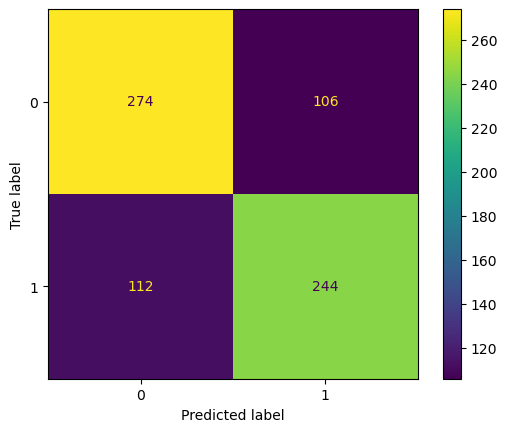

In [11]:
cnf_matrix = metrics.confusion_matrix(Y_train, Y_pred) # Calculate confusion matrix for the model
cnf_matrix # y_train is going be rows (obs), y_pred (predicted) are cols
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot() #create visualization of confusion matrix
plt.show() # Display the visualisation

<h6> Create confusion matrix for test data </h6>

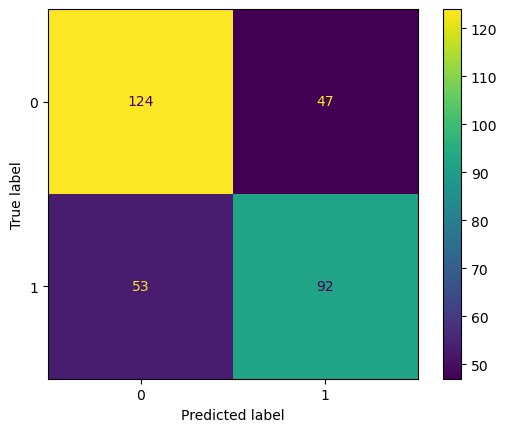

In [12]:
cnf_matrix1 = metrics.confusion_matrix(Y_test, Y_pred1) # Calculate confusion matrix for the model
cnf_matrix1 # y_test is going be rows (obs), y_pred1 (predicted) are cols
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix1)
disp1.plot() #create visualization of confusion matrix
plt.show() # Display the visualisation

<h6> Evaluate the model using accuracy, precision, recall for train data </h6>

In [13]:
print("Accuracy:",metrics.accuracy_score(Y_train, Y_pred)) #Accuracy of the model on training data
print("Precision:",metrics.precision_score(Y_train, Y_pred)) #Precision of the model on training data
print("Recall:",metrics.recall_score(Y_train, Y_pred)) #Recall of the model on training data

Accuracy: 0.7038043478260869
Precision: 0.6971428571428572
Recall: 0.6853932584269663


<h6> Evaluate the model using accuracy, precision, recall for train data </h6>

In [14]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred1)) #Accuracy of the model on testing data
print("Precision:",metrics.precision_score(Y_test, Y_pred1)) #Precision of the model on testing data
print("Recall:",metrics.recall_score(Y_test, Y_pred1)) #Recall of the model on testing data

Accuracy: 0.6835443037974683
Precision: 0.6618705035971223
Recall: 0.6344827586206897


<h6> ROC curve for the model for training data </h6>

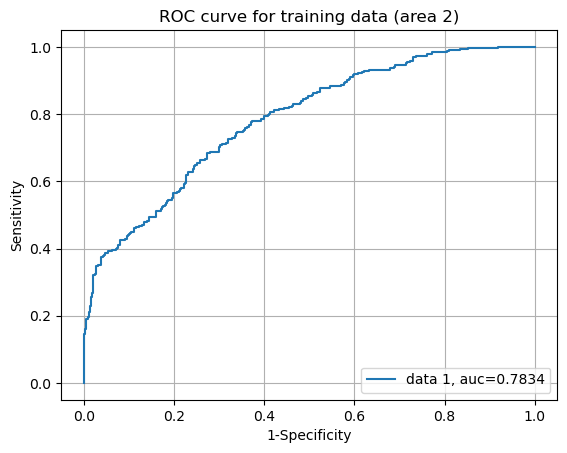

In [17]:
Y_pred_proba = logreg.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_train, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.title('ROC curve for training data (area 2)')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()

<h6> ROC curve for the model for testing data </h6>

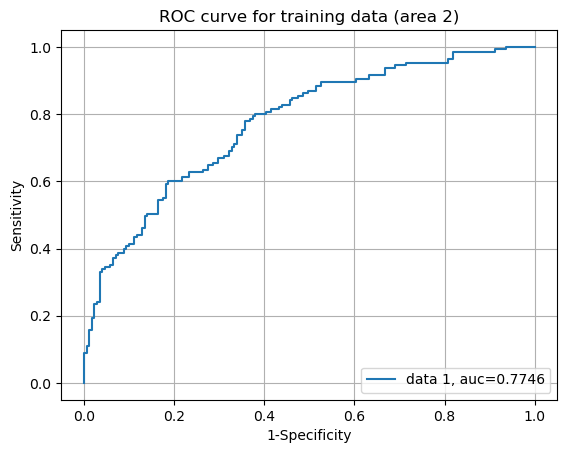

In [18]:
Y_pred_proba1 = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba1)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.title('ROC curve for training data (area 2)')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()